In [10]:
import altair as alt
import numpy as np
import pandas as pd
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [11]:
df = pd.read_csv('sort_deeprig.csv', sep=',', names=['algorithm', 'size', 'time'], skiprows=1)
df.head()

,algorithm,size,time
0,histogram,10,7
1,histogram,10,0
2,histogram,10,0
3,histogram,10,0
4,histogram,10,0


# Comparison of Sorting Algorithms by Running Time

## Entire Range (0 - 20 Mio)

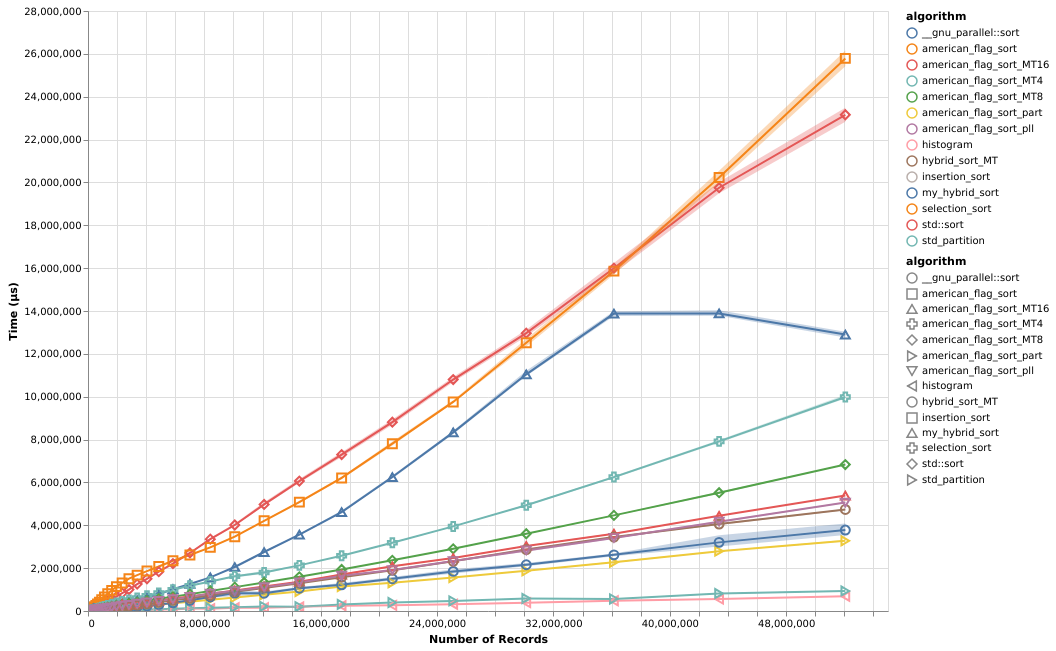

In [12]:
sc = alt.Scale()

base = alt.Chart(df, width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Range 28 Mio - 35 Mio

### American Flag Sort begins to perform better than std::sort

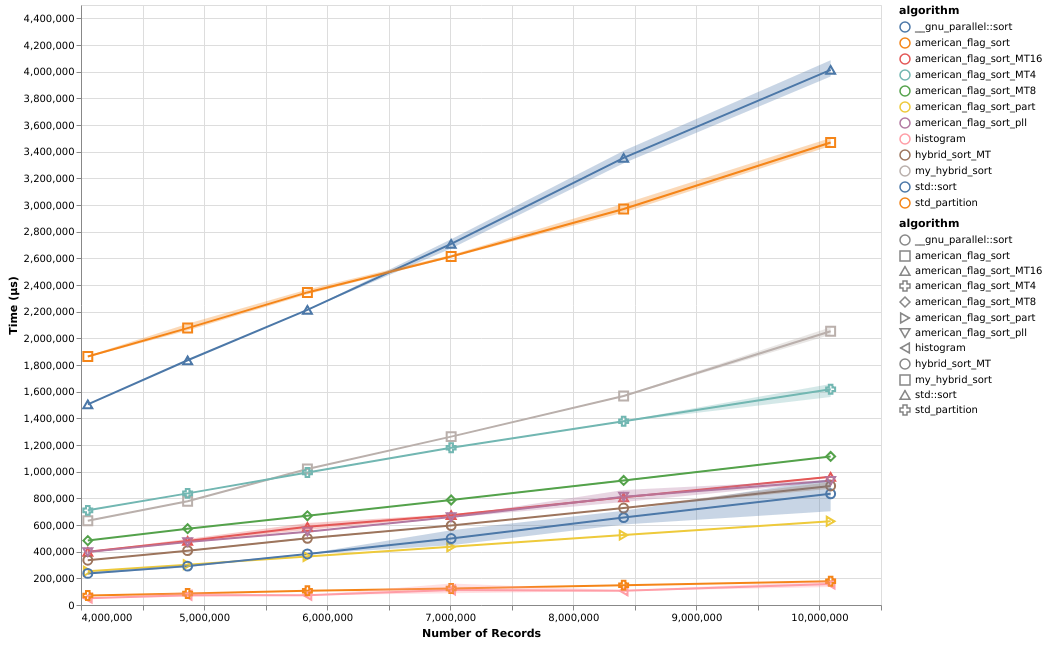

In [13]:
sc = alt.Scale()

base = alt.Chart(df[df['size'].between(4000000, 12000000)], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 4 Mio

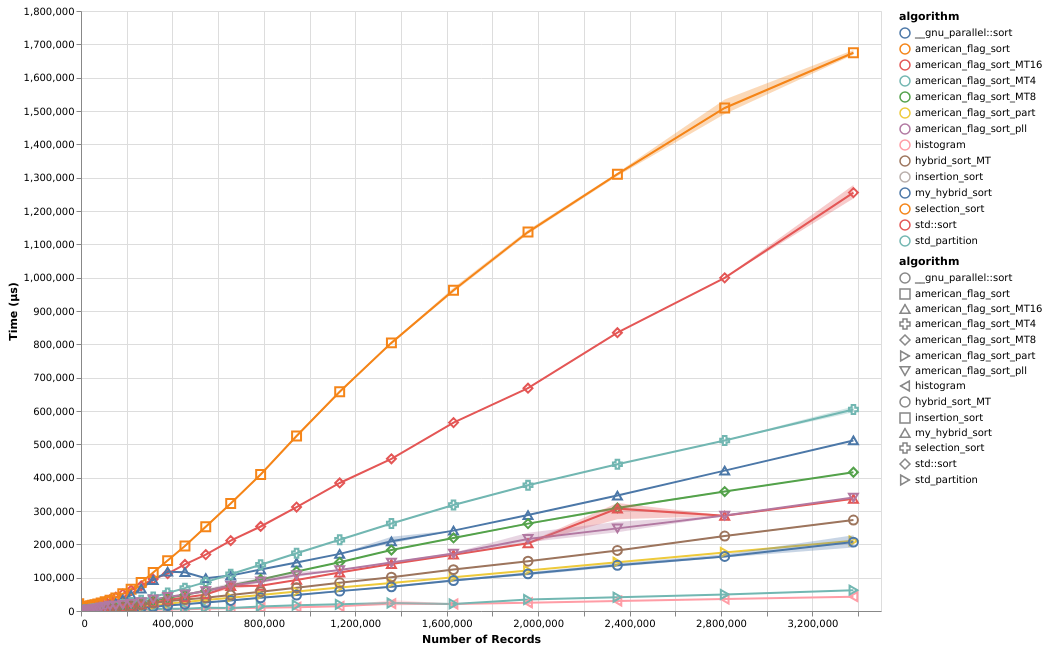

In [14]:
sc = alt.Scale()

base = alt.Chart(df[df['size'] < 4000000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 500,000

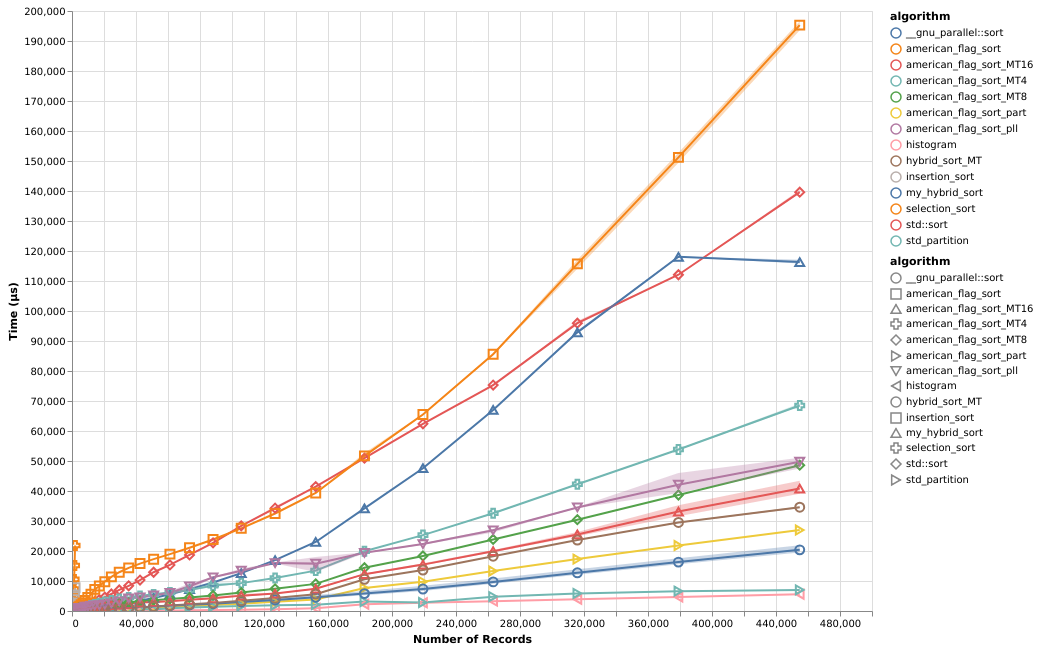

In [15]:
sc = alt.Scale()

base = alt.Chart(df[df['size'] < 500000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 70,000

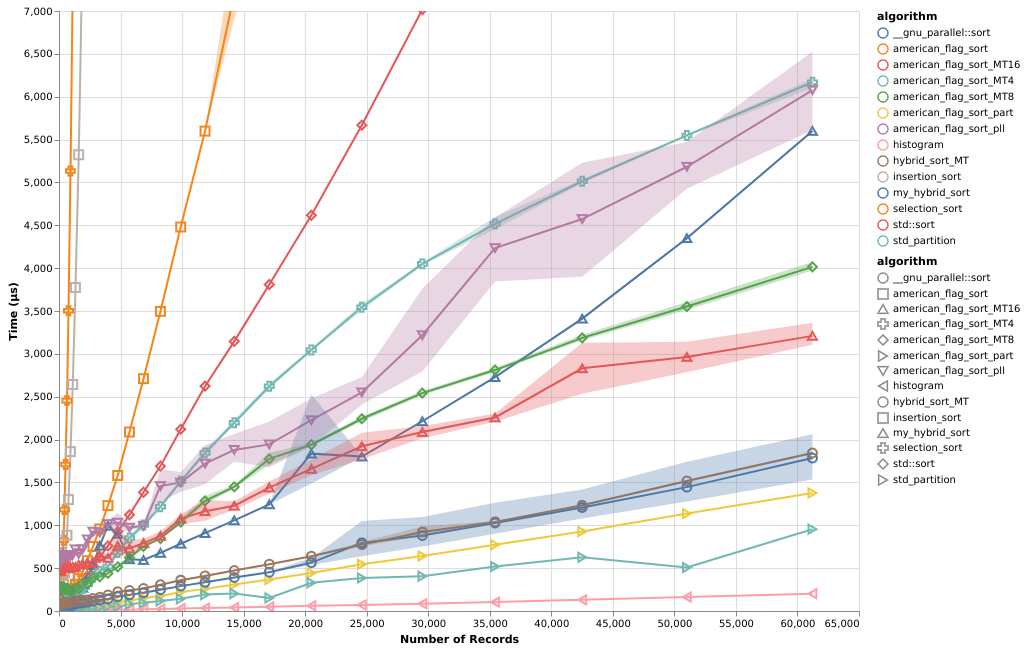

In [16]:
sc = alt.Scale(domain=[0, 7000])

base = alt.Chart(df[df['size'] < 70000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 10,000

- multi-threaded sorts have high fixed costs, but costs grow relatively slow
- MT hybrid sort outperforms std::sort at roughly 4k elements
- hybrid sort outperforms std::sort at roughly 9.5k elements

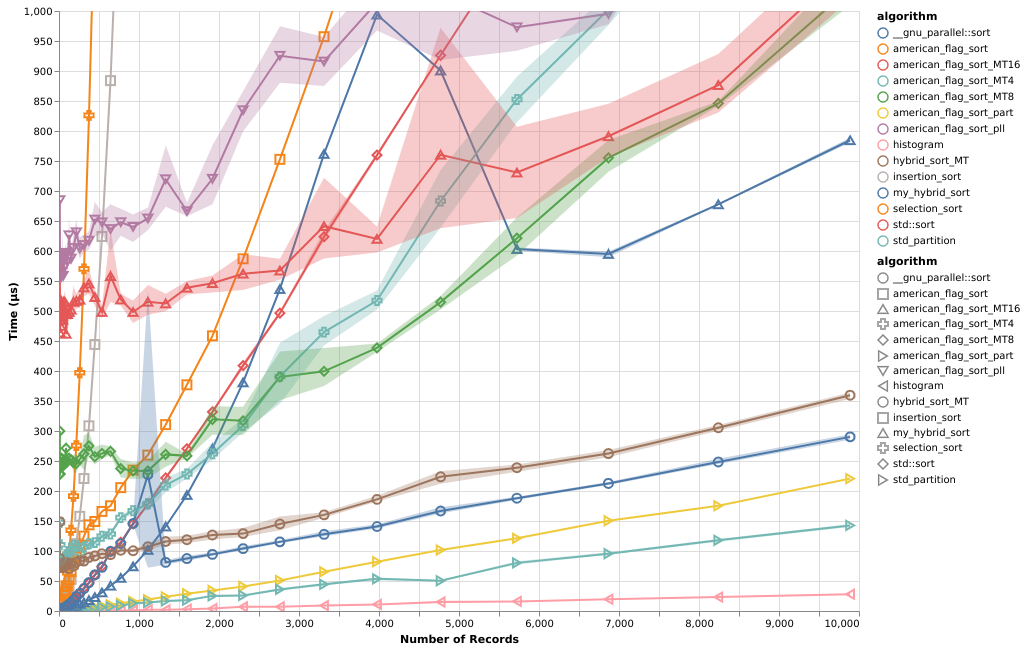

In [17]:
sc = alt.Scale(domain=[0, 1000])

base = alt.Chart(df[df['size'] < 10000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

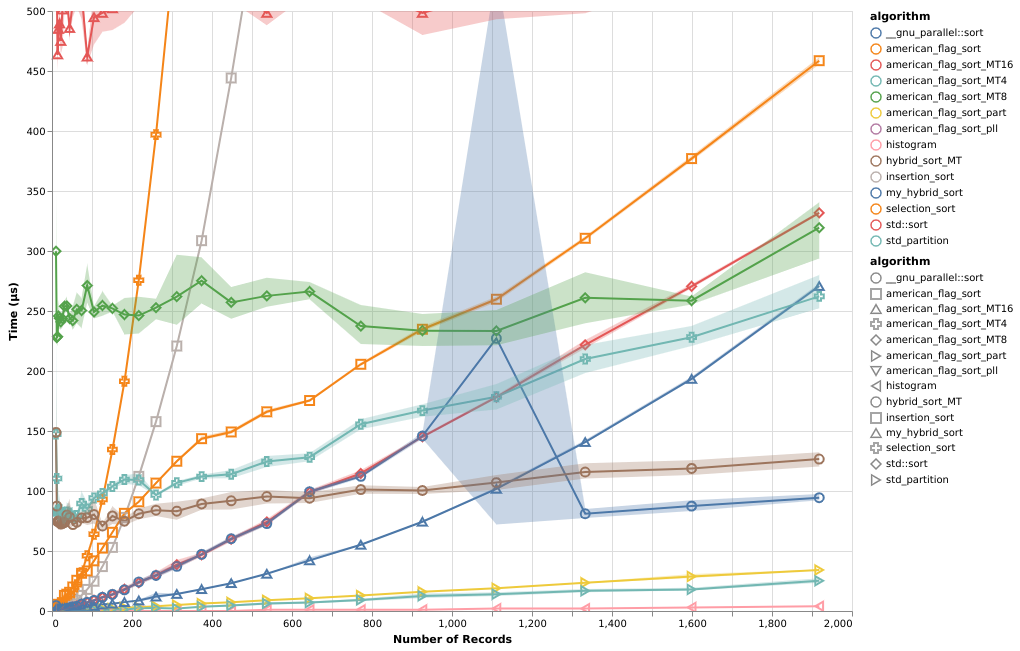

In [18]:
sc = alt.Scale(domain=[0, 500])

base = alt.Chart(df[df['size'] < 2000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI